# Relative feature tightness using part 4 for test data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np

from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

## Dataset prep

### Making feature pointwise mutual information profiles

In [3]:
profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp0_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp1_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp2_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp3_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp5_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp6_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp7_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp8_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp9_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)

In [4]:
profile0.add_another_cooccurrence_profile(profile1)
profile0.add_another_cooccurrence_profile(profile2)
profile0.add_another_cooccurrence_profile(profile3)
profile0.add_another_cooccurrence_profile(profile5)
profile0.add_another_cooccurrence_profile(profile6)
profile0.add_another_cooccurrence_profile(profile7)
profile0.add_another_cooccurrence_profile(profile8)
profile0.add_another_cooccurrence_profile(profile9)

In [5]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile0)

In [6]:
pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(probability_profile)

In [7]:
reference_profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp0_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp1_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp2_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp3_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp5_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp6_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp7_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp8_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp9_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)

In [8]:
reference_profile0.add_another_cooccurrence_profile(reference_profile1)
reference_profile0.add_another_cooccurrence_profile(reference_profile2)
reference_profile0.add_another_cooccurrence_profile(reference_profile3)
reference_profile0.add_another_cooccurrence_profile(reference_profile5)
reference_profile0.add_another_cooccurrence_profile(reference_profile6)
reference_profile0.add_another_cooccurrence_profile(reference_profile7)
reference_profile0.add_another_cooccurrence_profile(reference_profile8)
reference_profile0.add_another_cooccurrence_profile(reference_profile9)

In [9]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile0)

In [10]:
reference_pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(reference_probability_profile)

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [11]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1 feature2          
0        0         2.049439
         1         2.841951
         10        4.496097
         100       5.527128
         1000      3.257937
...                     ...
942      982      -5.312871
952      988      -3.934360
959      995      -0.027469
968      990      -3.727909
969      995      -0.027469

[2097986 rows x 1 columns]

### Sampling structures from COCONUT and ZINC datasets

In [12]:
coconut_samples = pd.read_csv('../data/CP1/COCONUT/COCOrandom.csv', delimiter = ' ')
coconut_samples = coconut_samples.drop(['Coconut_id'], axis=1)
coconut_samples['Name'] = 'COCONUT'

In [13]:
df_split_coco = np.array_split(coconut_samples, 10)

In [14]:
df_split_coco[4]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
154520,COc1cc(C2OC(c3ccc(O)c(OC)c3)C(C)C2C)ccc1O,344.162374,4.19980,GMXMKSFJQLFOSO-UHFFFAOYSA-N,GMXMKSFJQLFOSO,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[227, 249, 358, 555, 614, 656, 695, 807, 841, ..."
154521,CC(C)CCCC(COS(=O)(=O)[O-])C1CCC2C3CC=C4C(O)C(O...,497.294234,4.81640,LZQFXICFXNPJQL-UHFFFAOYSA-M,LZQFXICFXNPJQL,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 7, 8, 80, 91, 105, 118, 146, 164, 243, 283..."
154522,COc1cccc2c1NC13CCC4(CCCN5CCC21C54)CC3,310.204513,3.53940,AVBLSJWLHBCFSM-UHFFFAOYSA-N,AVBLSJWLHBCFSM,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[16, 241, 249, 297, 316, 389, 521, 547, 631, 6..."
154523,COc1cc(O)c(CC=C(C)CO)c(O)c1C(=O)C=Cc1ccc(O)cc1,370.141638,3.18920,PAISPFQETXMRRU-UHFFFAOYSA-N,PAISPFQETXMRRU,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[25, 31, 80, 104, 202, 209, 222, 249, 270, 425..."
154524,CC1C(=O)C=CC(C)(C)C12CC(Br)C(C)(Cl)CC2O,348.049170,3.68970,TYDKQXGEEOVOAX-UHFFFAOYSA-N,TYDKQXGEEOVOAX,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 113, 193, 314, 361, 464, 547, 650, 679, 6..."
...,...,...,...,...,...,...,...,...
193145,CC(C)C(C)(O)C1OC1C(C)(O)C1CC2(CCCC2)C2(O)C3=CC...,530.360739,4.31590,PYFMKHLLWHFQJC-UHFFFAOYSA-N,PYFMKHLLWHFQJC,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 43, 84, 93, 114, 159, 199, 231, 283, 314, ..."
193146,COc1cc(C(=O)OCC(C#N)=CCOC2OC(CO)C(O)C(O)C2O)ccc1O,425.132196,-1.17592,UWNLOPFIHDWHDR-UHFFFAOYSA-N,UWNLOPFIHDWHDR,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 145, 147, 170, 204, 222, 249, 284, 319, 4..."
193147,O=S(=O)(O)c1cccc(O)c1,173.998680,0.63890,ZCLXQTGLKVQKFD-UHFFFAOYSA-N,ZCLXQTGLKVQKFD,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[65, 319, 350, 381, 575, 592, 626, 650, 745, 8..."
193148,COc1cc2ccc3c(c2cc1OC)N(C)C(CCO)c1c-3ccc(OC)c1OC,409.188923,4.41450,VCIQDGITMVHJRZ-UHFFFAOYSA-N,VCIQDGITMVHJRZ,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[39, 80, 94, 146, 203, 213, 222, 249, 333, 352..."


In [15]:
zinc_samples = pd.read_csv('../data/CP1/ZINC/ZINCrandom.csv', delimiter = ' ')
zinc_samples = zinc_samples.drop(['Zinc_id'], axis=1)

In [16]:
df_split_zinc = np.array_split(zinc_samples, 10)
df_split_zinc[4]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
151606,COc1ccc(S(=O)(=O)N2CCCCCC2)cc1NC(=O)CCC(=O)c1c...,478.159614,4.53984,ITTRLRDPTPTSGV-UHFFFAOYSA-N,ITTRLRDPTPTSGV,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[2, 41, 80, 94, 103, 162, 249, 313, 319, 350, ..."
151607,CCCCn1c2nc3ccccc3[nH]c-2c(S(=O)(=O)c2ccc(C)cc2...,532.133589,5.80502,GOAABJIVFULFKA-UHFFFAOYSA-N,GOAABJIVFULFKA,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[30, 80, 119, 127, 155, 216, 235, 289, 294, 31..."
151608,C[C@H](c1cccc(C#N)c1)N1CCC[C@]2(CC(=O)c3ccccc3...,346.168128,4.11928,AJQHUCBCONYTLU-ZHRRBRCNSA-N,AJQHUCBCONYTLU,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 102, 113, 283, 305, 314, 334, 352, 410, 45..."
151609,C=C(C)CN1CC[C@H]([C@H]2CCCN(C(=O)c3cc(Cl)cn3C)...,349.192090,3.42870,HORCZOVCVMXSTO-HOTGVXAUSA-N,HORCZOVCVMXSTO,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 118, 191, 216, 276, 369, 446, 451, 464, 4..."
151610,Cc1ccc(-n2c(Cc3ccccc3)nnc2SCc2cccc(F)c2)cc1,389.136197,5.59792,BQZDEZKIKNKEIZ-UHFFFAOYSA-N,BQZDEZKIKNKEIZ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[58, 80, 116, 230, 233, 235, 318, 341, 378, 38..."
...,...,...,...,...,...,...,...,...
189502,O=C(Cc1cccnc1)N[C@@H]1CCn2nccc2C1,256.132411,0.95180,QLUOTTSYDWDNRZ-GFCCVEGCSA-N,QLUOTTSYDWDNRZ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 43, 80, 231, 325, 378, 387, 409, 437, 608..."
189503,FC(F)Oc1ccc(/C=C2/CCCC3=C2N=C2SC=C(c4ccccc4)N2...,564.149462,8.86910,SMMDLKRXPIRZEF-ICOYDVSFSA-N,SMMDLKRXPIRZEF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 5, 21, 25, 71, 224, 281, 322, 378, 389, 39..."
189504,Clc1ccc(/N=c2\scc(-c3ccc(Cl)cc3)n2CCc2ccccc2)cc1,424.056775,6.99850,WIPJNCRLSYIDSM-RWEWTDSWSA-N,WIPJNCRLSYIDSM,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[10, 80, 95, 170, 202, 216, 389, 552, 561, 675..."
189505,N#Cc1ccc(S(=O)(=O)N2CCC(C(=O)N3CCN(CC(=O)Nc4cc...,579.176325,2.64048,CYRYVAGZPRJFDG-UHFFFAOYSA-N,CYRYVAGZPRJFDG,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[34, 41, 53, 74, 80, 102, 114, 145, 191, 246, ..."


In [17]:
joint_samples = pd.concat((df_split_coco[4], df_split_zinc[4]), ignore_index=True)

In [18]:
for x in joint_samples.index:
    a = joint_samples['Bitset'][x]
    a = a.split(", ")
    a = re.sub('\[', '', str(a))
    a = re.sub('\]', '', str(a))
    tup = literal_eval(a)
    joint_samples['Bitset'][x] = tup

/var/tmp/pbs.43231.lich-compute.vscht.cz/ipykernel_35236/3101749155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_samples['Bitset'][x] = tup


## Relative feature tightness against a PMI interrelation profile

In [19]:
joint_samples['RFT'] = joint_samples['Bitset'].apply(
    lambda x: difference_pkld_profile.relative_feature_divergence(x))

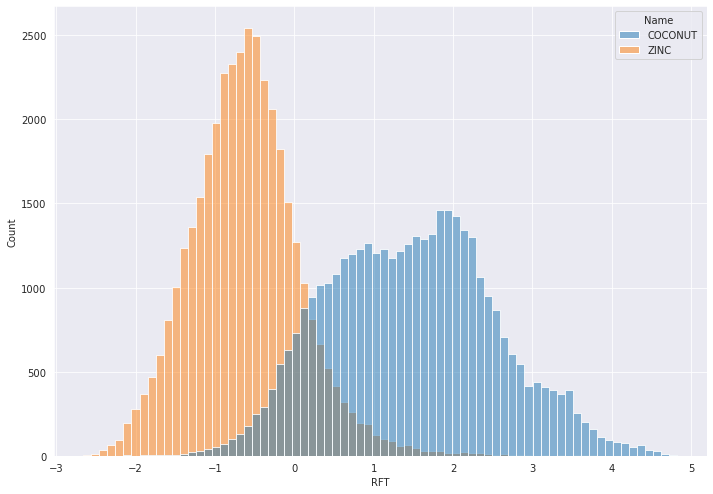

In [20]:
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(joint_samples, x='RFT', hue='Name')
plt.savefig(f"../images//joint_samples_RFT4.svg", format="svg")

According to the histogram, there is a visible split between Relative feature tightness distribution against the pointwise KL divergence profile between COCONUT and ZINC datasets, based on their radius 2 fragments. Larger fragments might diverge even further.